## Note
These graphs will look different from the ones in the paper. This is due to a much smaller sample of the trace being used in the artifact notebook, compared to what was used in the paper. This is done for speed as the [full key files](https://ftp.pdl.cmu.edu/pub/datasets/Baleen24/storage_key.tar.gz) are 8GB. With more resources, the same graphs can be generated in the paper by downloading the full files and changing the sample ratio used. Why it looks so different in those parts of the graph: the graph is on a log scale, and thus to get accurate values of popularity, a 10x larger trace is needed to get an additional tick on the x-axis (e.g., 10^3 to 10^2).


In [1]:
%run ../includes/common-20230414.ipynb

CPython 2024-01-15T08:21:06.818436


CPU times: user 89 µs, sys: 268 µs, total: 357 µs
Wall time: 369 µs


In [2]:
dfs = get_data()

9065


/tmp/ipykernel_38524/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_38524/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


In [3]:
df_ = monitor.filter_df_dct(dfs['raw'], {'AdmissionPolicy':'OfflineAnalysis','SampleStart': 0, 'Target DWPD': 7.5})
len(df_)

14

In [4]:
d_converged = filter_df(dfs['exp'], {'Target DWPD': 7.5, 'CanonAP': True, 'RealAP': True, 'ShortLabel': 'Baleen (ML Prefetch)'})

In [5]:
converged_eas_ml = d_converged.groupby("Region")["Avg Eviction Age (s)"].mean().to_dict()

In [6]:
# sample_ratio = 1
# Actual graphs in paper use 1%
sample_ratio = .1
regions = [
    '201910/Region1',
    '201910/Region2',
    '201910/Region3',
    '202110/Region4',
    '20230325/Region5',
    '20230325/Region6',
    '20230325/Region7',
]

In [7]:
local_cluster.TRACE_LOCATION = '../../data/tectonic'

In [8]:
%%time
import traceback
all_traces = {}
for kk in tqdm(regions):
    trace_group, region = kk.split('/')
    _trace_kwargs = dict(region=region, trace_group=trace_group, sample_ratio=sample_ratio, get_features=True, only_gets=False)
    try:
        all_traces[region] = trace_utils.get_accesses_kv(**_trace_kwargs)
    except:
        traceback.print_exc()

  0%|          | 0/7 [00:00<?, ?it/s]

Reading from file ../../data/tectonic/201910/Region1/full_0_0.1.trace
Reading from file ../../data/tectonic/201910/Region2/full_0_0.1.trace
Reading from file ../../data/tectonic/201910/Region3/full_0_0.1.trace
Reading from file ../../data/tectonic/202110/Region4/full_0_0.1.trace
Reading from file ../../data/tectonic/20230325/Region5/full_0_0.1.trace
Reading from file ../../data/tectonic/20230325/Region6/full_0_0.1.trace
Reading from file ../../data/tectonic/20230325/Region7/full_0_0.1.trace
CPU times: user 19.1 s, sys: 539 ms, total: 19.6 s
Wall time: 19.5 s


In [9]:
region_labels = maps.region_labels

,0,1,2,3,4,5,6
region,Region1,Region2,Region3,Region4,Region5,Region6,Region7
obj_u,25428,9878,23341,29819,45703,38905,57311
acc/obj_u,5.01,4.01,1.74,17.91,4.72,6.18,4.31
acc/day_u,"18,186.43","9,911.00","5,809.00","76,310.29","31,259.28","34,843.77","35,835.36"
acc/min_u,12.63,6.91,4.05,52.99,21.65,24.14,24.82
acc/s_u,0.21,0.12,0.07,0.88,0.36,0.40,0.41
acc_u,147794,48734,62372,555643,239146,268156,288539
put_u,20489,9090,21709,21471,23457,27734,41275
putone_u,20489,9090,21709,21462,23457,25817,37315
nogets_u,11740,4545,18900,11841,15066,14614,21498


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


CPU times: user 3.89 s, sys: 16 ms, total: 3.91 s
Wall time: 3.91 s


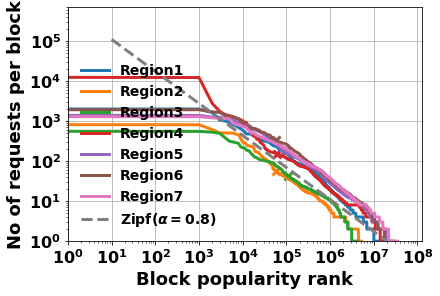

In [10]:
%%time
from matplotlib import ticker
def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'K', 2: 'M', 3: 'G', 4: 'T', 5: 'P', 6: 'E'}
    while size >= power:
        size /= power
        n += 1
    return str(int(size)) + power_labels[n]+'B'

from datetime import datetime
def fmt(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %a %H:%M:%S')
rows = []
ax = plt.gca()
for k, v in all_traces.items():
    k = region_labels[k]
    obj_acc_lens = []
    obj_puts = []
    sizes = []
    obj_starts = []
    obj_ends = []
    obj_sizes = []
    for kv in v['acc'].values():
        acc_gets = [acc for acc in kv.accesses if acc.features.op.value not in [op.value for op in utils.PUT_OPS]]
        acc_ts = [acc.ts for acc in acc_gets]
        obj_acc_lens.append(len(acc_gets))
        puts = len(kv.accesses) - len(acc_gets)
        obj_puts.append(puts)
        sizes.append([acc.size() for acc in kv.accesses])
        start = min(acc.orig_offset for acc in kv.accesses)
        end = max(acc.orig_endoffset for acc in kv.accesses)
        obj_sizes.append(end-start)
        obj_starts.append(start)
        obj_ends.append(end)
    obj_puts = np.array(obj_puts)
    obj_acc_lens = np.array(obj_acc_lens)
    all_sizes = flatten(sizes)
    tt = np.sum(obj_acc_lens)
    obj_sizes = np.array(obj_sizes)
    # sns.ecdfplot(obj_acc_lens, label=k)
    idx = np.argsort(obj_acc_lens)[::-1]
    ys = obj_acc_lens[idx]
    zs = obj_sizes[idx]
    dzs = zs.cumsum()

    xs = np.arange(len(ys)) / sample_ratio/0.01
    plt.plot(xs, ys, label=k)
    
    if k == 'Region1' or True:
        xlim = ax.get_xlim()
        for csize in [
#             1024*1024, 1024**3, (1024**3)*100,
                      (1024**3)*400,
#             1024**4, (1024**4)*10,
                      # 1024**5,
                     ]:
            numitems = np.searchsorted(dzs, csize*sample_ratio*0.01)
            if numitems <= 0 or numitems >= len(dzs):
                continue
            zs_x = numitems/sample_ratio/0.01
#             if csize == 1024**3 * 400:
#                 plt.axvline(zs, ls=':', c='red')
#             else:
#                 plt.axvline(zs, ls=':')
            plt.scatter([zs_x], [ys[int(numitems)]], marker='x') # label=format_bytes(csize))
#             plt.annotate(format_bytes(csize), xy=(zs_x*1.05, 10**4),
#                          xycoords='data', va='top', rotation=90)# , rotation = 270)
            # verticalalignment='right', horizontalalignment='right bottom'
    
    days = round(v['duration']/3600/24, 1)
    row = {
        'region': k,
        'obj_u': len(v['acc']),
        'acc/obj_u': tt/len(v['acc']),
        'acc/day_u': tt/days,
        'acc/min_u': tt/(v['duration']/60),
        'acc/s_u': tt/(v['duration']),
        'acc_u': v['logical_time'],
        'put_u': sum(obj_puts),
        'putone_u': sum(obj_puts > 0),
        'nogets_u': sum(obj_acc_lens == 0),
        'days': days,
        'start': fmt(v['start_ts']),
        'end': fmt(v['end_ts']),
        'avg_acc_size': np.mean(all_sizes)/1024/128,
        'avg_acc_size_MB': np.mean(all_sizes)/1024/1024,
        'avg_obj_start_MB': np.mean(obj_starts)/1024/128/8,
        'avg_obj_size_MB': np.mean(obj_sizes)/1024/128/8,
        'avg_obj_end_MB': np.mean(obj_ends)/1024/128/8,
        'bw_MB/s_u': np.sum(all_sizes)/1024/1024/(v['duration']),
        'bwperhdd_MB/s_u': np.sum(all_sizes)/1024/1024/(v['duration'])/36,

    }
    # % of accesses that are the first in their series (i.e., no of objects)
    row['compulsory_miss_rate_withpf'] = row['obj_u'] / row['acc_u']
    # one-hit-wonder: % of objects that have only 0 or 1 GETs
    row['one_hit_wonder'] = (obj_acc_lens <= 1).sum() / row['obj_u']
    row['put/obj'] = row['put_u'] / row['obj_u']
    row['put/acc'] = row['put_u'] / v['logical_time']
    row['putone/obj'] = row['putone_u'] / row['obj_u']
    # % of objects that have 0 gets
    row['nogets/obj'] = row['nogets_u'] / row['obj_u']
    for k in list(row.keys()):
        if k.endswith('_u'):
            row[k+"s"] = row[k] / sample_ratio / 0.01
    row['backend_size_TB_obj'] = row['obj_us'] * 8 / 1024 / 204
    row['backend_size_TB_acc'] = obj_sizes.sum()/1024/1204/1024/1024 / sample_ratio / 0.01
    row['backend_size_TB_accends'] = np.sum(obj_ends)/1024/1204/1024/1024 / sample_ratio / 0.01
    row['drive_size_TB_obj'] = row['backend_size_TB_obj']/36
    row['drive_size_TB_acc'] = row['backend_size_TB_acc']/36
    row['drive_size_TB_accends'] = row['backend_size_TB_accends']/36
    obj_ends
#     obj_sizes
    # print(*row)
    rows.append(row)
# plt.xlim(0, 20)
def plot_zipf(alpha, end=7.5):
    xs = np.logspace(1, end)
    ys = 10**(alpha*(end-np.log10(xs)))
    plt.plot(xs, ys, ls='dashed', label=f'Zipf($\\alpha={alpha:.1f}$)')
# plot_zipf(.9)
plot_zipf(.8, 7.3)
# plot_zipf(.8, 8)
# plot_zipf(.8, 7)
# plot_zipf(.9, 7)
# plot_zipf(1., 7)

# plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.legend(loc='lower left')
plt.grid(True)
plt.loglog()
plt.xlabel('Block popularity rank')
plt.ylabel('No of requests per block')

with pd.option_context('display.float_format', '{:,.2f}'.format):
    df = pd.DataFrame(rows) #, columns=['region', 'obj', 'acc/obj', 'acc/day', 'acc/min', 'acc', 'compulsory_miss', 'days', 'start', 'end'])
    display(df.T)
plt.ylim(1, None)
plt.xlim(1, None)
ax = plt.gca()
y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.xaxis.set_minor_locator(y_minor)

# savefig("traces", "popularity_dist-all")
# savefig("traces", "popularity_dist_1")

In [11]:
table_map = {
    'region': 'Dataset',
    'acc/s_us': 'Request Rate (s-1)',
    # 'avg_obj_size': 'Avg Obj Size (Range)',
    'avg_obj_end_MB': 'Obj Size, Avg (MB)',
    'avg_acc_size_MB': 'Access Size, Avg (MB)',
    'compulsory_miss_rate_withpf': 'Compulsory miss rate',
    'one_hit_wonder': 'One-hit-wonder rate',
    'nogets/obj': 'PUT-Only Blocks',
    'put/acc': '#PUT / #Acc',
}
percents_cols = ['compulsory_miss_rate_withpf', 'one_hit_wonder', 'nogets/obj','put/acc']
per_cols = [table_map[k] for k in percents_cols]
# def get_fmt()
# with pd.option_context('display.float_format', '{:.3g}'.format):
df_ = df[table_map.keys()].rename(columns=table_map).set_index("Dataset")
df_ = df_.style.format('{:.3g}')
df_ = df_.format(lambda x: '{:.0f}\%'.format(x*100), subset=per_cols, escape="latex")
print(df_.to_latex())
display(df_)

\begin{tabular}{lrrrrrrr}
 & Request Rate (s-1) & Obj Size, Avg (MB) & Access Size, Avg (MB) & Compulsory miss rate & One-hit-wonder rate & PUT-Only Blocks & #PUT / #Acc \\
Dataset &  &  &  &  &  &  &  \\
Region1 & 211 & 5.74 & 3.42 & 17\% & 61\% & 46\% & 14\% \\
Region2 & 115 & 6.74 & 2.55 & 20\% & 55\% & 46\% & 19\% \\
Region3 & 67.5 & 5.09 & 2.75 & 37\% & 87\% & 81\% & 35\% \\
Region4 & 883 & 5.88 & 3.59 & 5\% & 53\% & 40\% & 4\% \\
Region5 & 361 & 6.85 & 2.71 & 19\% & 59\% & 33\% & 10\% \\
Region6 & 402 & 6.76 & 2.8 & 15\% & 55\% & 38\% & 10\% \\
Region7 & 414 & 5.74 & 2.48 & 20\% & 62\% & 38\% & 14\% \\
\end{tabular}



,Request Rate (s-1),"Obj Size, Avg (MB)","Access Size, Avg (MB)",Compulsory miss rate,One-hit-wonder rate,PUT-Only Blocks,#PUT / #Acc
Dataset,,,,,,,
Region1,211,5.74,3.42,17\%,61\%,46\%,14\%
Region2,115,6.74,2.55,20\%,55\%,46\%,19\%
Region3,67.5,5.09,2.75,37\%,87\%,81\%,35\%
Region4,883,5.88,3.59,5\%,53\%,40\%,4\%
Region5,361,6.85,2.71,19\%,59\%,33\%,10\%
Region6,402,6.76,2.8,15\%,55\%,38\%,10\%
Region7,414,5.74,2.48,20\%,62\%,38\%,14\%


In [12]:
df_sizes = df.set_index("region")["avg_obj_size_MB"]
df_sizes

region
Region1    5.719565
Region2    6.715250
Region3    5.083730
Region4    5.835140
Region5    6.683008
Region6    6.654452
Region7    5.653439
Name: avg_obj_size_MB, dtype: float64

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

CPU times: user 1.38 s, sys: 408 ms, total: 1.78 s
Wall time: 1.28 s


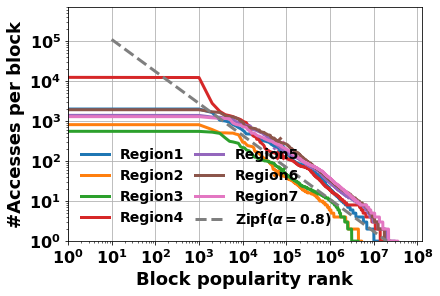

In [13]:
%%time
# Graph should be based on 100% - keys
# sample_ratio_ = 10
sample_ratio_ = 0.1
# TODO: full.keys != 100 (often more, sometimes less)
import matplotlib.ticker as ticker
for kk in regions:
    trace_group, region = kk.split('/')
    if sample_ratio_ == 100:
        keyfile = local_cluster.TRACE_LOCATION + "/{}/{}/full.keys".format(trace_group, region)
    else:
        keyfile = local_cluster.TRACE_LOCATION + "/{}/{}/full_0_{}.keys".format(trace_group, region, sample_ratio_)
    alls = []
    with open(keyfile) as f:
        for line in tqdm(f):
            numgets = line.split()[2]
            alls.append(int(numgets))
    ys = sorted(alls, reverse=True)
    xs = np.arange(len(ys)) / sample_ratio_/0.01
    ax = plt.gca()
    plt.plot(xs, ys, label=region_labels[region])
    
    # Approx: will be less accurate on left side, assuming that size and #access are not independent
    dzs = (np.ones(len(ys))*df_sizes.loc[region_labels[region]]*1024*1024).cumsum()
    
        # xlim = ax.get_xlim()
    for csize in [
#         1024*1024, 1024**3, (1024**3)*100,
                  (1024**3)*400,
#         1024**4, (1024**4)*10,
                  # 1024**5,
                 ]:
        numitems = np.searchsorted(dzs, csize*sample_ratio_*0.01)
        if numitems <= 0 or numitems >= len(dzs):
            continue
        zs_x = numitems/sample_ratio_/0.01
        # Need to have real sizes
        plt.scatter([zs_x], [ys[int(numitems)]], marker='x') # label=format_bytes(csize))
plot_zipf(.8, 7.3)
plt.legend(loc='lower left', ncol=2)
plt.grid(True)
plt.loglog()
plt.xlabel('Block popularity rank')
plt.ylabel('#Accesses per block')

plt.ylim(1, None)
plt.xlim(1, None)
ax = plt.gca()
y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.xaxis.set_minor_locator(y_minor)

savefig("trace-stats", f"popularity_dist_{sample_ratio_}")

In [14]:
dfs = get_data()

9065


/tmp/ipykernel_38524/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_38524/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


In [15]:
d_converged = filter_df(dfs['exp'], {'Target DWPD': 7.5, 'CanonAP': True, 'RealAP': True, 'ShortLabel': 'Baleen (ML Prefetch)'})

In [16]:
converged_eas_ml = d_converged.groupby("Region")["Avg Eviction Age (s)"].mean().to_dict()

/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by

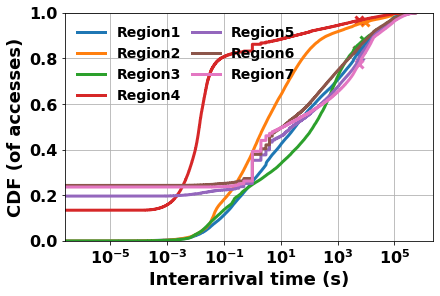

In [17]:
ax = plt.gca()
for k, v in all_traces.items():
    kl = region_labels[k]
    obj_acc_lens = []
    obj_puts = []
    sizes = []
    obj_starts = []
    obj_ends = []
    obj_sizes = []
    ias = []
    for kv in v['acc'].values():
        acc_gets = [acc for acc in kv.accesses if acc.features.op.value not in [op.value for op in utils.PUT_OPS]]
        acc_ts = [acc.ts for acc in acc_gets]
        interarrivals = np.diff(acc_ts)
        ias.append(interarrivals)
    all_ias = np.array(sorted(flatten(ias)))
    sns.ecdfplot(all_ias, log_scale=[True, False], label=kl)
    
    idx = np.searchsorted(all_ias, converged_eas_ml[k])
    plt.scatter([converged_eas_ml[k]], [idx/len(all_ias)], marker='x') # label='400GB, 34MB/s', 

y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 30)
# ax.xaxis.set_minor_locator(y_minor)
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
# plt.loglog()
plt.xlabel('Interarrival time (s)')
plt.ylabel('CDF (of accesses)')
savefig("trace-stats", "interarrival_dist")

In [18]:
reload(utils)

<module 'BCacheSim.cachesim.utils' from '/home/cc/Baleen-FAST24/notebooks/paper-figs/../../BCacheSim/cachesim/utils.py'>

  0%|          | 0/7 [00:00<?, ?it/s]

/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cc/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by

CPU times: user 5.29 s, sys: 725 ms, total: 6.01 s
Wall time: 5.22 s


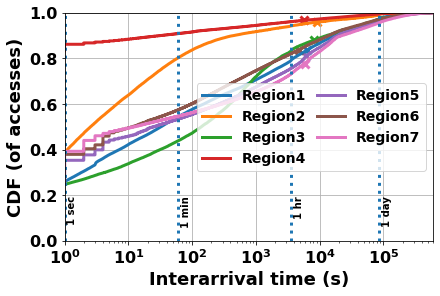

In [19]:
%%time
from matplotlib import ticker
ax = plt.gca()
for k, v in tqdm(all_traces.items()):
    kl = maps.region_labels[k]
    obj_acc_lens = []
    obj_puts = []
    sizes = []
    obj_starts = []
    obj_ends = []
    obj_sizes = []
    ias = []
    for kv in v['acc'].values():
        acc_gets = [acc for acc in kv.accesses if acc.features.op.value not in [op.value for op in utils.PUT_OPS]]
        acc_ts = [acc.ts for acc in acc_gets]
        interarrivals = np.diff(acc_ts)
        ias.append(interarrivals)
    all_ias = np.array(sorted(flatten(ias)))
    sns.ecdfplot(all_ias, log_scale=[True, False], label=kl)
    
    idx = np.searchsorted(all_ias, converged_eas_ml[k])
    plt.scatter([converged_eas_ml[k]], [idx/len(all_ias)], marker='x') # label='400GB, 34MB/s', 


for tpoint in [1, 60, 3600, 3600*24]:
    plt.axvline(tpoint, ls=':')
    plt.annotate(utils.fmt_dur(tpoint), xy=(tpoint*1.1, 0.2),
                 xycoords='data', va='top', rotation=90)# , rotation = 270)

    
y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 30)
# ax.xaxis.set_minor_locator(y_minor)
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
plt.legend(loc='center right', ncol=2, frameon=True)
plt.grid(True)
plt.xlim(1, 3600*24*7)
# plt.loglog()
plt.xlabel('Interarrival time (s)')
plt.ylabel('CDF (of accesses)')
savefig("trace-stats", f"interarrival_dist_{sample_ratio}")

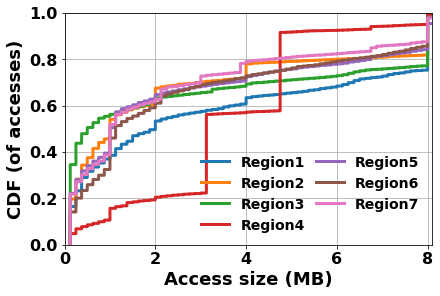

In [20]:
ax = plt.gca()
for k, v in all_traces.items():
    k = region_labels[k]
    obj_acc_lens = []
    obj_puts = []
    sizes = []
    obj_starts = []
    obj_ends = []
    obj_sizes = []
    ias = []
    for kv in v['acc'].values():
        acc_gets = [acc for acc in kv.accesses if acc.features.op.value not in [op.value for op in utils.PUT_OPS]]
        acc_ts = [acc.ts for acc in acc_gets]
        interarrivals = np.diff(acc_ts)
        obj_acc_lens.append(len(acc_gets))
        puts = len(kv.accesses) - len(acc_gets)
        obj_puts.append(puts)
        sizes.append([acc.size() for acc in kv.accesses])
        start = min(acc.orig_offset for acc in kv.accesses)
        end = max(acc.orig_endoffset for acc in kv.accesses)
        obj_sizes.append(end-start)
        obj_starts.append(start)
        obj_ends.append(end)
        ias.append(interarrivals)
    obj_puts = np.array(obj_puts)
    obj_acc_lens = np.array(obj_acc_lens)
    all_sizes = np.array(flatten(sizes))
    all_ias = np.array(flatten(ias))
    sns.ecdfplot(all_sizes/1024/1024, log_scale=[False, False], label=k)

# y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
# ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
# ax.xaxis.set_minor_locator(y_minor)
plt.legend(ncol=2)
plt.grid(True)
plt.xlim(0, 8.1)
# plt.loglog()
plt.xlabel('Access size (MB)')
plt.ylabel('CDF (of accesses)')
savefig("trace-stats", "access_size_dist")